In [14]:
import mysql.connector
import pandas as pd

# Database connection configuration
config = {
    'user': 'root',        # Replace with your MySQL username
    'password': 'Pin@2020',    # Replace with your MySQL password
    'host': 'localhost',            # Replace with your MySQL host (e.g., 'localhost' or an IP address)
    'database': 'cloudbroker',    # Replace with your database name
    'port': 3306                    # Default MySQL port
}

# List of tables to fetch
tables_to_fetch = ['simulation_results', 'compare_algos']  # Replace with your table names

# Dictionary to store DataFrames
dataframes = {}

try:
    # Establish the connection
    connection = mysql.connector.connect(**config)

    if connection.is_connected():
        print("Connected to MySQL database")

        # Create a cursor object to interact with the database
        cursor = connection.cursor()

        # Fetch each table and store it in a DataFrame
        for table_name in tables_to_fetch:
            query = f"SELECT * FROM {table_name}"
            cursor.execute(query)

            # Fetch all rows and column names
            rows = cursor.fetchall()
            columns = [column[0] for column in cursor.description]  # Get column names

            # Create a DataFrame
            df = pd.DataFrame(rows, columns=columns)
            dataframes[table_name] = df  # Store DataFrame in the dictionary

            print(f"Fetched table: {table_name} with {len(df)} rows")

except mysql.connector.Error as err:
    print(f"Error: {err}")

finally:
    # Close the cursor and connection
    if 'cursor' in locals() and cursor is not None:
        cursor.close()
    if 'connection' in locals() and connection.is_connected():
        connection.close()
        print("MySQL connection is closed")

# Access DataFrames for further processing
for table_name, df in dataframes.items():
    print(f"\nDataFrame for table: {table_name}")
    print(df.head())  # Display the first few rows of each DataFrame

Connected to MySQL database
Fetched table: simulation_results with 1620 rows
Fetched table: compare_algos with 2400 rows
MySQL connection is closed

DataFrame for table: simulation_results
   id  datacenter_id datacenter_name  datacenter_cpu_cost  \
0   1              1    Datacenter 1                 0.05   
1   2              1    Datacenter 1                 0.05   
2   3              1    Datacenter 1                 0.05   
3   4              1    Datacenter 1                 0.05   
4   5              1    Datacenter 1                 0.05   

   datacenter_ram_cost  datacenter_storage_cost  datacenter_bw_cost  host_id  \
0                 0.01                    0.001               0.005       14   
1                 0.01                    0.001               0.005       19   
2                 0.01                    0.001               0.005       30   
3                 0.01                    0.001               0.005       37   
4                 0.01                    0.

In [15]:
df = dataframes['simulation_results']
df2 = dataframes['compare_algos']

In [16]:
df2

,id,cloudlet_id,algo,algo_eff_time,min_cost,min_executn_time,instance_type_id,datacenter_id,created_at,updated_at
0,1,1.0,greedy,0.16,0.04,1.61,649.0,9.0,2025-03-04 19:44:50.342745,2025-03-04 19:44:50.342745
1,2,1.0,dynamic_programming,0.00,0.04,1.61,649.0,9.0,2025-03-04 19:44:50.503628,2025-03-04 19:44:50.503628
2,3,1.0,divide_and_conquer,0.00,None,None,649.0,9.0,2025-03-04 19:44:50.730090,2025-03-04 19:44:50.730090
3,4,2.0,greedy,0.02,0.02,0.87,650.0,9.0,2025-03-04 19:44:51.071042,2025-03-04 19:44:51.071042
4,5,2.0,dynamic_programming,0.00,0.02,0.87,650.0,9.0,2025-03-04 19:44:51.295229,2025-03-04 19:44:51.295229
...,...,...,...,...,...,...,...,...,...,...
2395,2396,NaN,dynamic_programming,0.00,None,None,NaN,NaN,2025-03-04 19:51:14.508269,2025-03-04 19:51:14.508269
2396,2397,NaN,divide_and_conquer,0.00,None,None,NaN,NaN,2025-03-04 19:51:14.706964,2025-03-04 19:51:14.706964
2397,2398,NaN,greedy,0.00,None,None,NaN,NaN,2025-03-04 19:51:15.150476,2025-03-04 19:51:15.150476
2398,2399,NaN,dynamic_programming,0.00,None,None,NaN,NaN,2025-03-04 19:51:15.477649,2025-03-04 19:51:15.477649


In [19]:
df2.columns

Index(['id', 'cloudlet_id', 'algo', 'algo_eff_time', 'min_cost',
       'min_executn_time', 'instance_type_id', 'datacenter_id', 'created_at',
       'updated_at'],
      dtype='object')

In [ ]:
df2.describe()

In [12]:
df.describe()

,id,datacenter_id,datacenter_cpu_cost,datacenter_ram_cost,datacenter_storage_cost,datacenter_bw_cost,host_id,host_cpu_cores,host_ram,host_storage,...,ram_utilization,bw_utilization,execution_time_breach,cpu_breach,ram_breach,bw_breach,cost,sla_breach_cost,created_at,updated_at
count,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.0,6659.0,6659.0,...,6659.0,6659.0,6659.000000,6659.0,6659.0,6659.0,6659.000000,6659.000000,6659,6659
mean,3330.000000,6.355309,0.063807,0.013281,0.001328,0.006586,404.551284,40000.0,1277440.0,5000000.0,...,1.0,1.0,0.025229,0.0,0.0,0.0,0.445048,1.120584,2025-03-04 02:32:34.455238656,2025-03-04 02:32:34.455238656
min,1.000000,1.000000,0.020000,0.004000,0.000400,0.002000,0.000000,40000.0,1277440.0,5000000.0,...,1.0,1.0,0.000000,0.0,0.0,0.0,0.003974,0.119475,2025-03-03 18:53:01.998512,2025-03-03 18:53:01.998512
25%,1665.500000,2.000000,0.040000,0.008000,0.000800,0.004000,25.000000,40000.0,1277440.0,5000000.0,...,1.0,1.0,0.000000,0.0,0.0,0.0,0.026058,0.588739,2025-03-03 19:01:53.996104704,2025-03-03 19:01:53.996104704
50%,3330.000000,4.000000,0.060000,0.013000,0.001300,0.006500,151.000000,40000.0,1277440.0,5000000.0,...,1.0,1.0,0.000000,0.0,0.0,0.0,0.098401,0.774720,2025-03-03 19:56:29.070662912,2025-03-03 19:56:29.070662912
75%,4994.500000,10.000000,0.090000,0.019000,0.001900,0.009500,545.000000,40000.0,1277440.0,5000000.0,...,1.0,1.0,0.000000,0.0,0.0,0.0,0.363014,1.028330,2025-03-04 10:25:05.993593344,2025-03-04 10:25:05.993593344
max,6659.000000,20.000000,0.130000,0.028000,0.002800,0.013000,1999.000000,40000.0,1277440.0,5000000.0,...,1.0,1.0,1.000000,0.0,0.0,0.0,12.714700,14.871000,2025-03-04 11:08:47.800024,2025-03-04 11:08:47.800024
std,1922.432053,5.754115,0.028754,0.006372,0.000637,0.002957,571.042562,0.0,0.0,0.0,...,0.0,0.0,0.156832,0.0,0.0,0.0,1.100471,1.284952,NaN,NaN


In [17]:
df.columns


Index(['id', 'datacenter_id', 'datacenter_name', 'datacenter_cpu_cost',
       'datacenter_ram_cost', 'datacenter_storage_cost', 'datacenter_bw_cost',
       'host_id', 'host_cpu_cores', 'host_ram', 'host_storage', 'host_bw',
       'host_mips', 'vm_id', 'vm_cpu_cores', 'vm_ram', 'vm_storage', 'vm_bw',
       'vm_mips', 'cloudlet_id', 'cloudlet_length', 'cloudlet_pes',
       'cloudlet_file_size', 'cloudlet_output_size', 'execution_time',
       'cpu_utilization', 'ram_utilization', 'bw_utilization',
       'storage_utilization', 'execution_time_breach', 'cpu_breach',
       'ram_breach', 'bw_breach', 'cost', 'sla_breach_cost', 'created_at',
       'updated_at'],
      dtype='object')

/tmp/ipykernel_213662/2530174719.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='datacenter_name', y='execution_time', data=df, ci=None, palette='viridis')
/tmp/ipykernel_213662/2530174719.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='datacenter_name', y='execution_time', data=df, ci=None, palette='viridis')


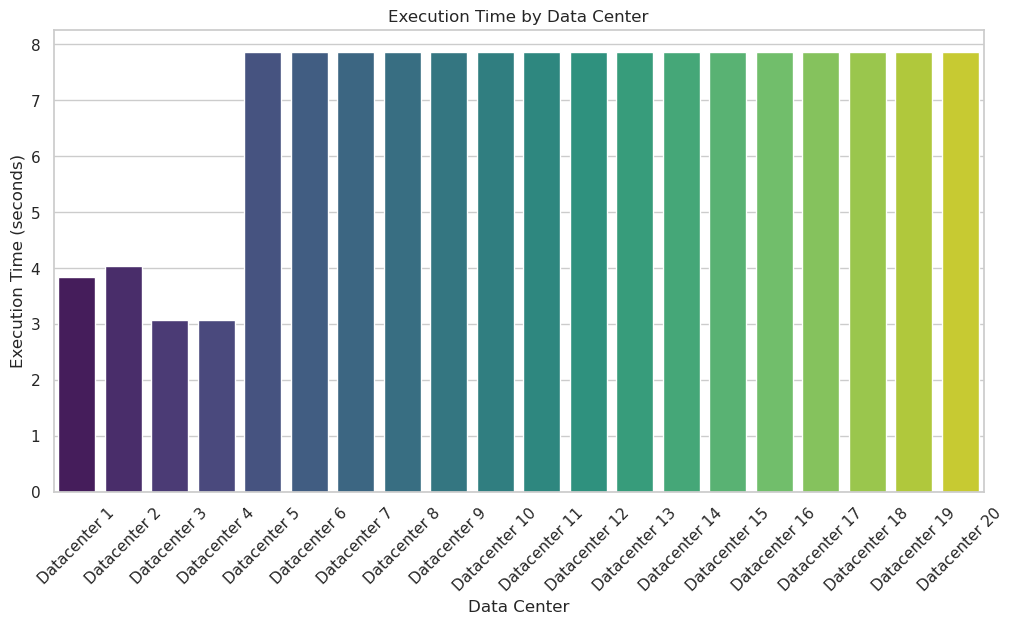

/tmp/ipykernel_213662/2530174719.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='datacenter_name', y='cost', data=df, ci=None, palette='magma')
/tmp/ipykernel_213662/2530174719.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='datacenter_name', y='cost', data=df, ci=None, palette='magma')


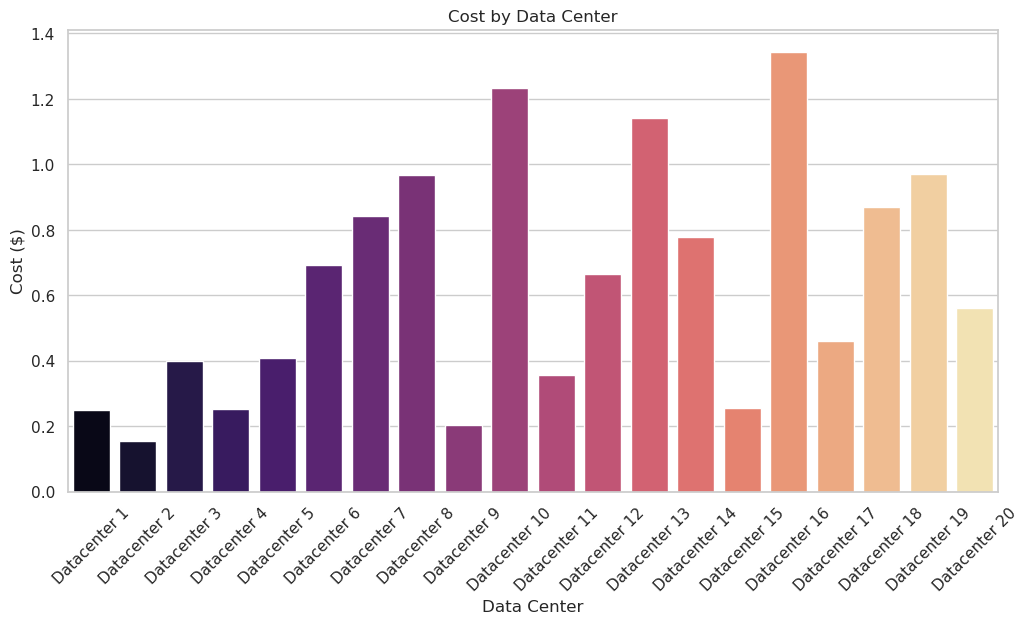

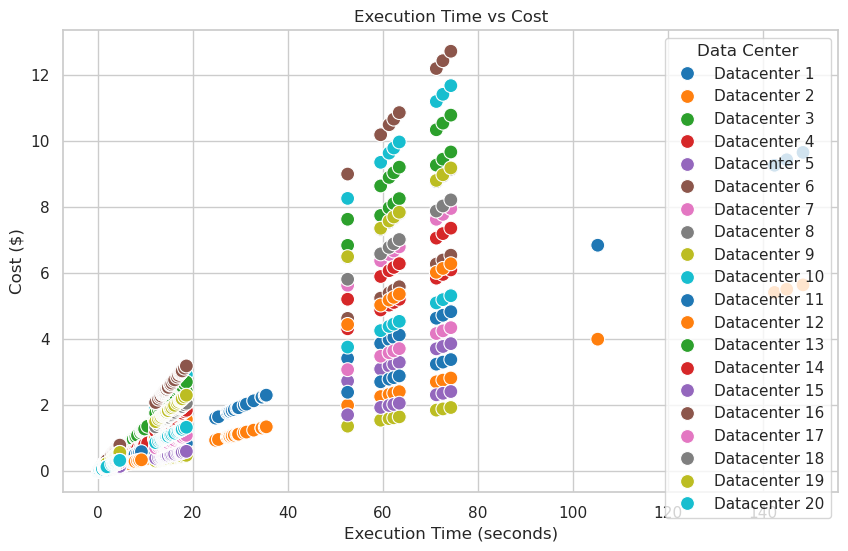

/tmp/ipykernel_213662/2530174719.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='host_id', y='execution_time', data=df, palette='coolwarm')


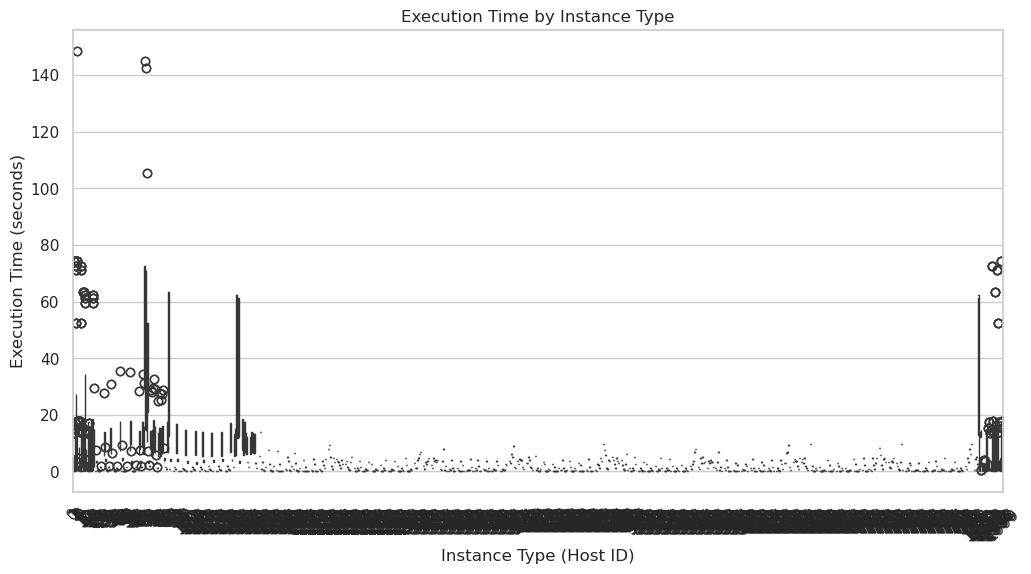

/tmp/ipykernel_213662/2530174719.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='host_id', y='cost', data=df, palette='coolwarm')


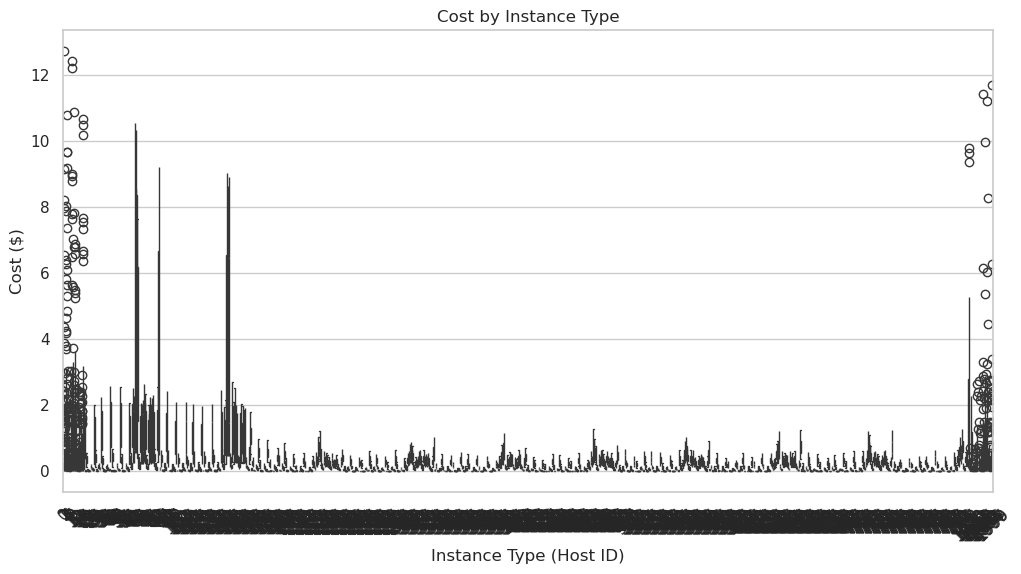

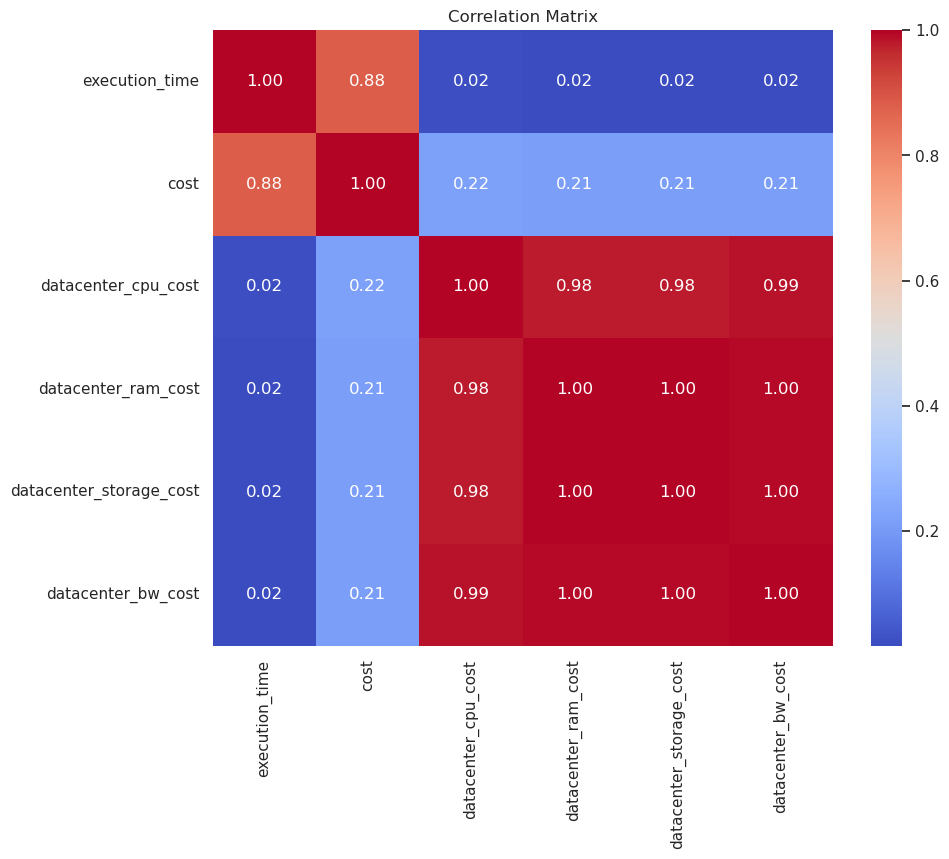

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Example: df = pd.read_csv('your_data.csv') or df = dataframes['your_table_name']

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Bar Plot: Execution Time by Data Center
plt.figure(figsize=(12, 6))
sns.barplot(x='datacenter_name', y='execution_time', data=df, ci=None, palette='viridis')
plt.title('Execution Time by Data Center')
plt.xlabel('Data Center')
plt.ylabel('Execution Time (seconds)')
plt.xticks(rotation=45)
plt.show()

# 2. Bar Plot: Cost by Data Center
plt.figure(figsize=(12, 6))
sns.barplot(x='datacenter_name', y='cost', data=df, ci=None, palette='magma')
plt.title('Cost by Data Center')
plt.xlabel('Data Center')
plt.ylabel('Cost ($)')
plt.xticks(rotation=45)
plt.show()

# 3. Scatter Plot: Execution Time vs Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='execution_time', y='cost', hue='datacenter_name', data=df, palette='tab10', s=100)
plt.title('Execution Time vs Cost')
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Cost ($)')
plt.legend(title='Data Center')
plt.show()

# 4. Box Plot: Execution Time by Instance Type (host_id or vm_id)
plt.figure(figsize=(12, 6))
sns.boxplot(x='vm_id', y='execution_time', data=df, palette='coolwarm')
plt.title('Execution Time by Instance Type')
plt.xlabel('Instance Type (Host ID)')
plt.ylabel('Execution Time (seconds)')
plt.xticks(rotation=45)
plt.show()

# 5. Box Plot: Cost by Instance Type (host_id or vm_id)
plt.figure(figsize=(12, 6))
sns.boxplot(x='host_id', y='cost', data=df, palette='coolwarm')
plt.title('Cost by Instance Type')
plt.xlabel('Instance Type (Host ID)')
plt.ylabel('Cost ($)')
plt.xticks(rotation=45)
plt.show()

# 6. Heatmap: Correlation Matrix (Optional)
# Compute correlation matrix
corr = df[['execution_time', 'cost', 'datacenter_cpu_cost', 'datacenter_ram_cost', 'datacenter_storage_cost', 'datacenter_bw_cost']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

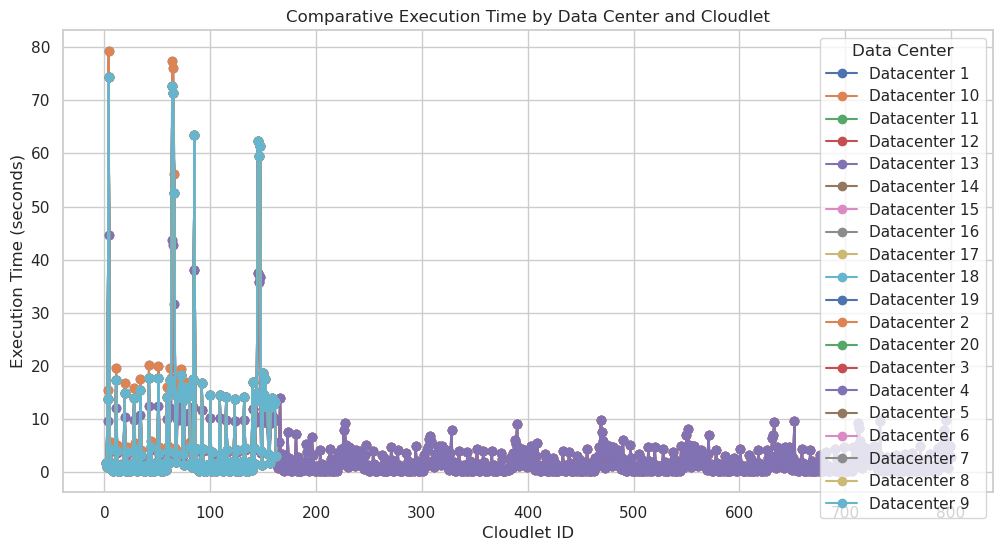

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Example: df = pd.read_csv('your_data.csv') or df = dataframes['your_table_name']

# Set the style for seaborn
sns.set(style="whitegrid")

# Group by datacenter_name and cloudlet_id to calculate average execution time
grouped_data = df.groupby(['datacenter_name', 'cloudlet_id'])['execution_time'].mean().reset_index()

# Pivot the data for easier plotting
pivot_data = grouped_data.pivot(index='cloudlet_id', columns='datacenter_name', values='execution_time')

# Plot the line graph
plt.figure(figsize=(12, 6))
for datacenter in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[datacenter], marker='o', label=datacenter)

# Add labels and title
plt.title('Comparative Execution Time by Data Center and Cloudlet')
plt.xlabel('Cloudlet ID')
plt.ylabel('Execution Time (seconds)')
plt.legend(title='Data Center')
plt.grid(True)
plt.show()

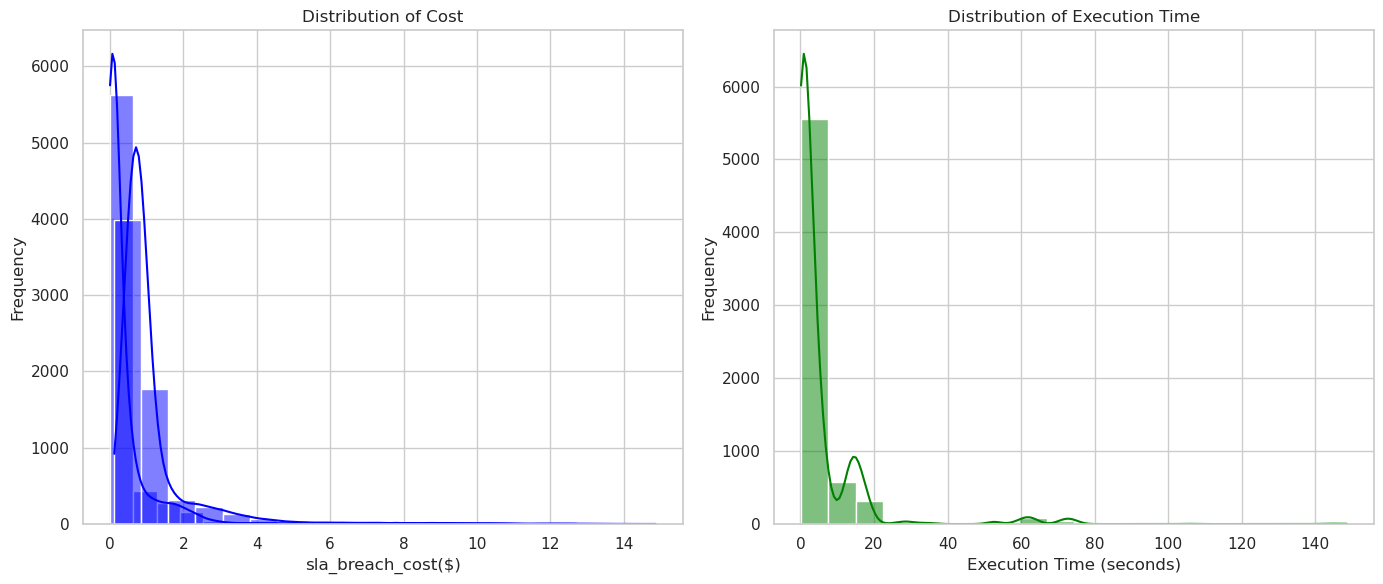

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Example: df = pd.read_csv('your_data.csv') or df = dataframes['your_table_name']

# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots for two histograms
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# 1. Histogram for Cost
sns.histplot(df['cost'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Cost')
axes[0].set_xlabel('Cost ($)')
axes[0].set_ylabel('Frequency')

# 1. Histogram for Cost
sns.histplot(df['sla_breach_cost'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Cost')
axes[0].set_xlabel('sla_breach_cost($)')
axes[0].set_ylabel('Frequency')

# 2. Histogram for Execution Time
sns.histplot(df['execution_time'], bins=20, kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribution of Execution Time')
axes[1].set_xlabel('Execution Time (seconds)')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\Hamzah\AppData\Local\Temp\ipykernel_14308\3041664178.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='algo', y='algo_eff_time', data=algo_eff_time_avg, palette='viridis')


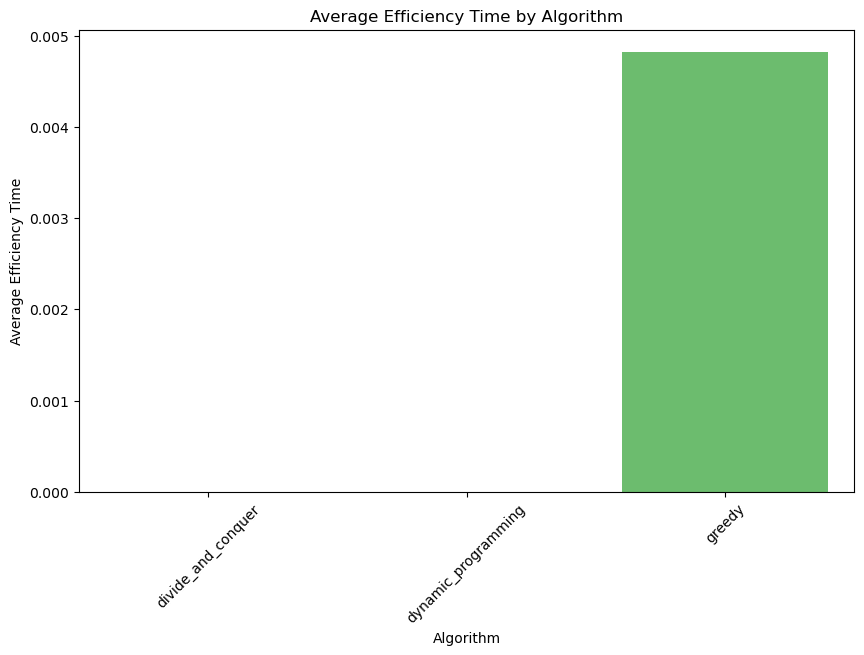

In [22]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'algo' and calculate the mean of 'algo_eff_time'
algo_eff_time_avg = df2.groupby('algo')['algo_eff_time'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='algo', y='algo_eff_time', data=algo_eff_time_avg, palette='viridis')
plt.title('Average Efficiency Time by Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Average Efficiency Time')
plt.xticks(rotation=45)
plt.show()

C:\Users\Hamzah\AppData\Local\Temp\ipykernel_14308\1101684248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='algo', y='algo_eff_time', data=df2, palette='Set2')


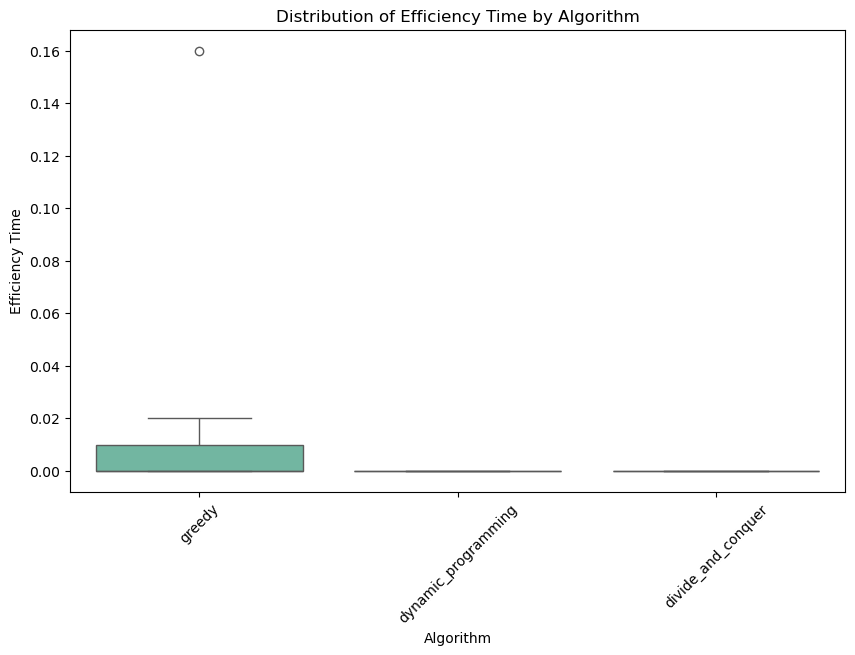

In [23]:
# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='algo', y='algo_eff_time', data=df2, palette='Set2')
plt.title('Distribution of Efficiency Time by Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Efficiency Time')
plt.xticks(rotation=45)
plt.show()

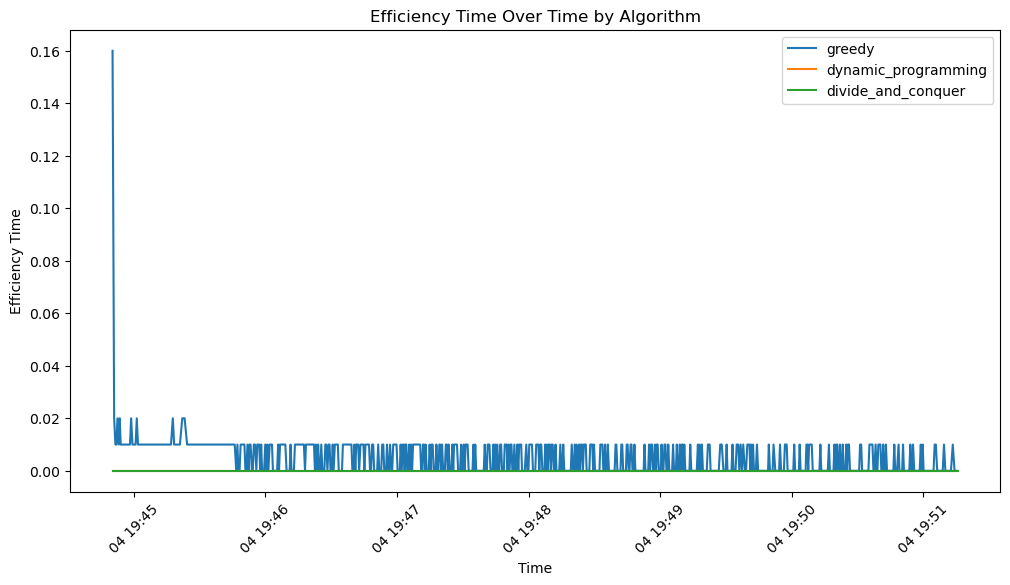

In [24]:
# Convert 'created_at' to datetime (if not already)
df2['created_at'] = pd.to_datetime(df2['created_at'])

# Plot the line chart
plt.figure(figsize=(12, 6))
for algo in df2['algo'].unique():
    algo_data = df2[df2['algo'] == algo]
    plt.plot(algo_data['created_at'], algo_data['algo_eff_time'], label=algo)

plt.title('Efficiency Time Over Time by Algorithm')
plt.xlabel('Time')
plt.ylabel('Efficiency Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

C:\Users\Hamzah\AppData\Local\Temp\ipykernel_14308\3591792486.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='algo', y='algo_eff_time', data=algo_eff_time_avg, palette='viridis')


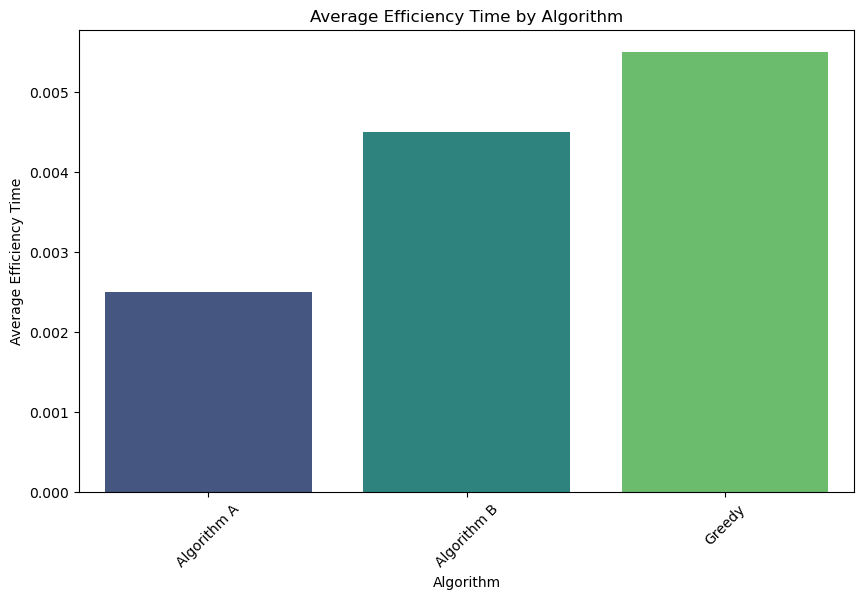

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame (replace with your actual data)
data = {
    'algo': ['Greedy', 'Algorithm A', 'Algorithm B', 'Greedy', 'Algorithm A', 'Algorithm B'],
    'algo_eff_time': [0.005, 0.003, 0.004, 0.006, 0.002, 0.005]
}
df2 = pd.DataFrame(data)

# Group by 'algo' and calculate the mean of 'algo_eff_time'
algo_eff_time_avg = df2.groupby('algo')['algo_eff_time'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='algo', y='algo_eff_time', data=algo_eff_time_avg, palette='viridis')
plt.title('Average Efficiency Time by Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Average Efficiency Time')
plt.xticks(rotation=45)
plt.show()

['Greedy' 'Algorithm A' 'Algorithm B']


C:\Users\Hamzah\AppData\Local\Temp\ipykernel_14308\2141035720.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='algo', y='algo_eff_time', data=algo_eff_time_avg, palette='viridis')


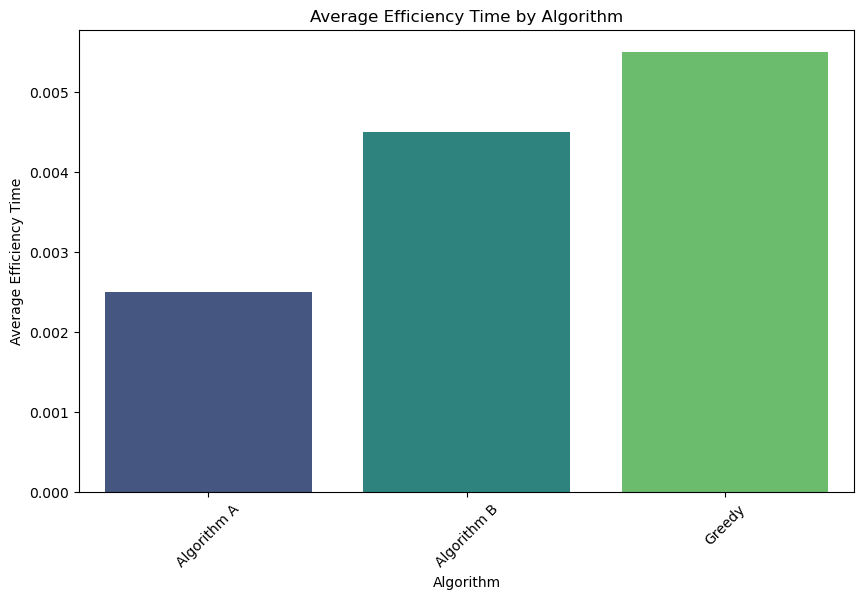

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the DataFrame contains data for all algorithms
print(df2['algo'].unique())  # Check if all algorithms are present

# Group by 'algo' and calculate the mean of 'algo_eff_time'
algo_eff_time_avg = df2.groupby('algo')['algo_eff_time'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='algo', y='algo_eff_time', data=algo_eff_time_avg, palette='viridis')
plt.title('Average Efficiency Time by Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Average Efficiency Time')
plt.xticks(rotation=45)
plt.show()